In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('/content/court_spb_final.csv')
df.head()

,case_id,filing_date,decision_date,judge,category,claim_amount,plaintiff,defendant,result
0,А56-99/2023,2023-01-03,2023-02-14,Михайлов П.Л.,Иные споры (виндикация),0.00,"ОАО ""ЗАВОД ""ЭЛЕКТРОПРИБОР""","АО ""НПП ""ПРОФИЛЬ""",0
1,А56-287/2023,2023-01-04,2023-03-14,Радынов С.В.,Договорные споры,108723.74,"ООО ""ТРАНС-ЮНИОН""","ООО ""НПО ЛАБОРАТОРИЯ СПЕЦИАЛЬНЫХ СТАЛЕЙ И СПЛА...",2
2,А56-506/2023,2023-01-05,2024-10-07,Сурков А.А.,Подряд / Строительство,1274448.86,"ООО ""АВАНГАРД""","ООО ""МОНОЛИТ""",2
3,А56-507/2023,2023-01-05,2023-07-09,Анисимова О.В.,Иные споры (исполнительное производство),4404157.72,"ООО ""ПЛАНЕТА ЭЛКОМП""",БАНК ВТБ (ПАО),0
4,А56-999/2023,2023-01-09,2023-03-16,Курова И.Н.,Услуги,31259.08,"ГУП ""ВОДОКАНАЛ САНКТ-ПЕТЕРБУРГА""","ООО ""ЖИЛКОМСЕРВИС № 1 ФРУНЗЕНСКОГО РАЙОНА""",2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   case_id        367 non-null    object 
 1   filing_date    367 non-null    object 
 2   decision_date  367 non-null    object 
 3   judge          367 non-null    object 
 4   category       367 non-null    object 
 5   claim_amount   367 non-null    float64
 6   plaintiff      367 non-null    object 
 7   defendant      367 non-null    object 
 8   result         367 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 25.9+ KB


In [4]:
df['target']=df['result'].apply(lambda x: -1 if x==-1 else 0 if x==0 else 1)

df.tail()

,case_id,filing_date,decision_date,judge,category,claim_amount,plaintiff,defendant,result,target
362,А56-129650/2023,2023-12-30,2024-01-14,Сайфуллина А.Г.,Налоги и сборы,2000.00,ОТДЕЛЕНИЕ ФОНДА ПЕНСИОННОГО И СОЦИАЛЬНОГО СТРА...,"ООО ""РБМ""",2,1
363,А56-129600/2023,2023-12-29,2024-11-01,Семенова И.С.,Банкротство,0.00,КОРКИН Е.С. (ДОЛЖНИК),КРЕДИТОРЫ,-1,-1
364,А56-129593/2023,2023-12-29,2025-03-25,Бутова Р.А.,Договорные споры,0.00,"ПАО ""РОССЕТИ ЛЕНЭНЕРГО""","ГКУ ЛО ""УПРАВЛЕНИЕ АВТОМОБИЛЬНЫХ ДОРОГ ЛЕНИНГР...",-1,-1
365,А56-129023/2023,2023-12-28,2025-03-10,Калайджян А.А.,Банкротство,0.00,АЗАРОВ Э.П. (ДОЛЖНИК),КРЕДИТОРЫ,-1,-1
366,А56-128963/2023,2023-12-28,2024-03-07,Ульянова М.Н.,Договорные споры,90208.22,"ПАО ""РОССЕТИ ЛЕНЭНЕРГО""","ООО ""ДЕРЖАВА""",2,1


In [5]:
category_count=df['category'].value_counts()
top10_cat=category_count.head(10)
df_cat=df[df['category'].isin(top10_cat.index)]

In [6]:
print(f"минимальная сумма иска: {df['claim_amount'].min():,.0f}")
print(f"максимальная сумма иска: {df['claim_amount'].max():,.0f}")
print(f"медиана: {df['claim_amount'].median():,.0f}")
print(f"среднее: {df['claim_amount'].mean():,.0f}")
print(f"количество значений: {len(df['claim_amount'])}")
print(f"количество NaN: {df['claim_amount'].isna().sum()}")

минимальная сумма иска: 0
максимальная сумма иска: 3,086,758,167
медиана: 100,000
среднее: 10,606,636
количество значений: 367
количество NaN: 0


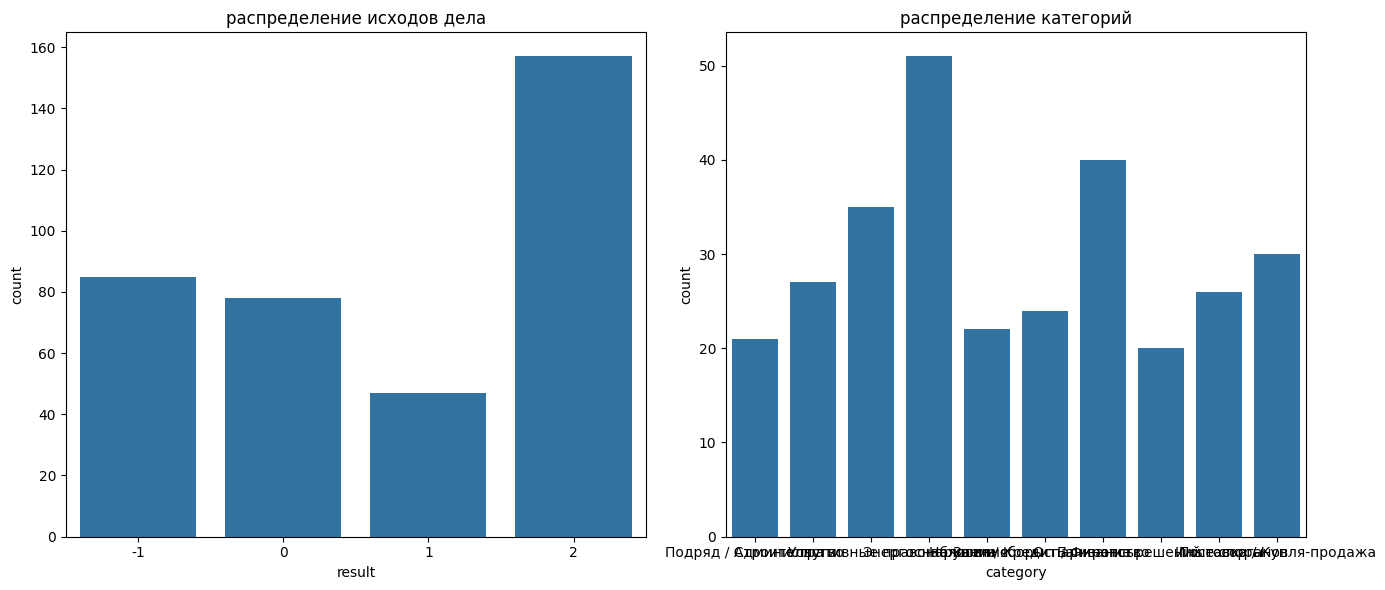

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(1,2,figsize=(14,6))

sns.countplot(x='result',data=df,ax=axes[0])
axes[0].set_title('распределение исходов дела')

sns.countplot(x='category',data=df_cat,ax=axes[1])
axes[1].set_title('распределение категорий')

plt.tight_layout()

In [8]:
df['filing_date']=pd.to_datetime(df['filing_date'])
df['decision_date']=pd.to_datetime(df['decision_date'])

df['duration']=(df['decision_date']-df['filing_date']).dt.days

df.groupby('result')['duration'].mean()

,duration
result,
-1,198.988235
0,145.397436
1,148.468085
2,94.286624


Text(0.5, 1.0, 'длительность процессов по исходам')

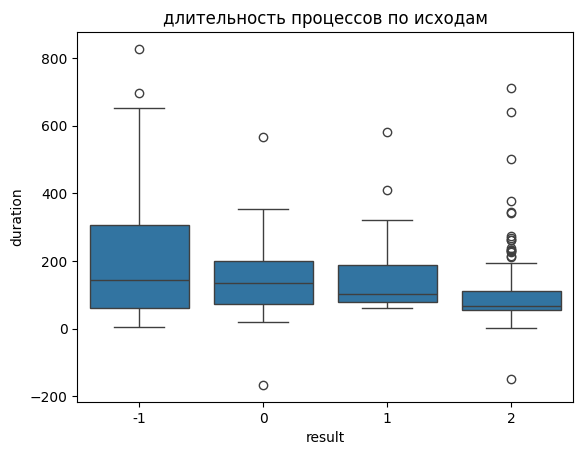

In [9]:
sns.boxplot(x='result',y='duration',data=df)
plt.title('длительность процессов по исходам')

Text(0.5, 1.0, 'кол-во дел по месяцам')

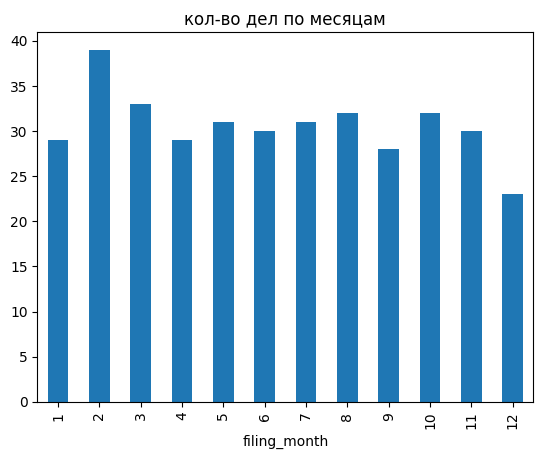

In [10]:
df['filing_month']=df['filing_date'].dt.month
df['filing_month'].value_counts().sort_index().plot(kind='bar')
plt.title('кол-во дел по месяцам')

In [11]:
top_plaintiffs=df['plaintiff'].value_counts().head(20)
top_defendants=df['defendant'].value_counts().head(20)

In [12]:
top_plaintiffs

,count
plaintiff,
"АО ""Петербургская сбытовая компания""",9
"ПАО ""ТГК-1""",6
ОТДЕЛЕНИЕ ФОНДА ПЕНСИОННОГО И СОЦИАЛЬНОГО СТРАХОВАНИЯ РФ ПО СПБ И ЛО,5
"ПАО ""Территориальная генерирующая компания №1""",4
"ПАО ""Сбербанк России""",4
"ООО ""Интерлизинг""",4
"ПАО ""РОССЕТИ ЛЕНЭНЕРГО""",4
Отделение Фонда пенсионного и социального страхования РФ по Санкт-Петербургу и Ленинградской области,4
"ПАО ""Россети Ленэнерго""",4


In [13]:
top_defendants

,count
defendant,
Кредиторы,14
Управление Федеральной антимонопольной службы по Санкт-Петербургу,4
Кредиторы (реестр),3
Кредиторы в деле о банкротстве,2
КРЕДИТОРЫ,2
УФАС по Ленинградской области,2
Кредиторы (реестр требований),2
УФАС по Санкт-Петербургу,2
Государственная жилищная инспекция Санкт-Петербурга,2


In [14]:
def get_plaintiff_type(name):
    name = str(name).upper()

    # фонды/госорганы
    if any(word in name for word in ['ФОНД', 'КОМИТЕТ', 'АДМИНИСТРАЦИЯ', 'УПРАВЛЕНИЕ']):
        return 'госорган'

    # коммунальщики
    elif any(word in name for word in ['ВОДОКАНАЛ', 'ТОПЛИВНО', 'ЖИЛКОМ']):
        return 'ком_служба'

    # энергетика
    elif any(word in name for word in ['СБЫТОВАЯ', 'ТГК', 'РОССЕТИ', 'ЭНЕРГ', 'ТЕПЛО']):
        return 'энергокомпания'

    # банки/финансы
    elif any(word in name for word in ['БАНК', 'СБЕР', 'ЛИЗИНГ', 'КРЕДИТ']):
        return 'фин_организация'

    # частные компании
    elif any(word in name for word in ['ООО', 'АО', 'ПАО', 'ЗАО']):
        return 'частная_компания'

    # ИП
    elif 'ИП' in name:
        return 'ИП'

    else:
        return 'другое'


def get_defendant_type(name):
    name = str(name).upper()

    # банкротство
    if 'КРЕДИТОР' in name:
        return 'банкротство'

    # госорганы
    elif any(word in name for word in ['УФАС', 'ИНСПЕКЦИЯ', 'ТАМОЖНЯ', 'КОМИТЕТ',
                                      'АДМИНИСТРАЦИЯ', 'УПРАВЛЕНИЕ', 'ФОНД']):
        return 'госорган'

    # частные компании
    elif any(word in name for word in ['ООО', 'АО', 'ПАО', 'ЗАО']):
        return 'частная_компания'

    # ИП
    elif 'ИП' in name:
        return 'ИП'

    # остальное
    else:
        return 'другое'

df['plaintiff_type'] = df['plaintiff'].apply(get_plaintiff_type)
df['defendant_type'] = df['defendant'].apply(get_defendant_type)

print("типы истцов:")
print(df['plaintiff_type'].value_counts())
print("\nтипы ответчиков:")
print(df['defendant_type'].value_counts())

типы истцов:
plaintiff_type
частная_компания    161
другое               57
госорган             46
энергокомпания       36
ИП                   24
ком_служба           22
фин_организация      21
Name: count, dtype: int64

типы ответчиков:
defendant_type
частная_компания    196
другое               59
госорган             46
ИП                   41
банкротство          25
Name: count, dtype: int64


In [15]:
df['claim_amount'] = df['claim_amount'].astype(float)

# новые признаки

df['log_claim_amount']=np.log1p(df['claim_amount']) #логарифм суммы иска (для нормализации)
df['no_claim']=(df['claim_amount']==0).astype(int)

# группы сумм иска
bins=[-1,0,10000,100000, 1000000, float('inf')]
labels=['0','до 10к','10-100к','100к-1м','>1м']
df['claim_bin']=pd.cut(df['claim_amount'],bins=bins,labels=labels)

df['is_long_case']=(df['duration']>df['duration'].median()).astype(int)
df['quarter']=df['filing_date'].dt.quarter


df['gov_company'] = ((df['plaintiff_type'] == 'госорган') & (df['defendant_type'] == 'частная_компания')).astype(int)

#банкротства с любым истцом
df['bankruptcy_any'] = (df['category'] == 'Банкротство').astype(int)

# банкротства с нулевыми исками
df['bankruptcy_zero_claim'] = ((df['category'] == 'Банкротство') & (df['claim_amount'] == 0)).astype(int)

# диапазон сумм для частичного удовлетворения
df['claim_med']=((df['claim_amount']>10000)&(df['claim_amount']<500000))

df['is_bankruptcy']=(df['category']=='Банкротство').astype(int)
df['short_duration']=(df['duration']<30).astype(int)
df['IP_strong']=((df['plaintiff_type']=='ИП')&(df['defendant_type'].isin(['частная_компания','госорган']))).astype(int)
df['is_complex_category'] = df['category'].isin(['Интеллектуальная собственность', 'Корпоративные споры','Налоги и сборы']).astype(int)
df['small_claim_with_gov'] = ((df['claim_bin'].isin(['0', 'до 10к'])) & (df['defendant_type'] == 'госорган')).astype(int)

df.head()

,case_id,filing_date,decision_date,judge,category,claim_amount,plaintiff,defendant,result,target,...,quarter,gov_company,bankruptcy_any,bankruptcy_zero_claim,claim_med,is_bankruptcy,short_duration,IP_strong,is_complex_category,small_claim_with_gov
0,А56-99/2023,2023-01-03,2023-02-14,Михайлов П.Л.,Иные споры (виндикация),0.00,"ОАО ""ЗАВОД ""ЭЛЕКТРОПРИБОР""","АО ""НПП ""ПРОФИЛЬ""",0,0,...,1,0,0,0,False,0,0,0,0,0
1,А56-287/2023,2023-01-04,2023-03-14,Радынов С.В.,Договорные споры,108723.74,"ООО ""ТРАНС-ЮНИОН""","ООО ""НПО ЛАБОРАТОРИЯ СПЕЦИАЛЬНЫХ СТАЛЕЙ И СПЛА...",2,1,...,1,0,0,0,True,0,0,0,0,0
2,А56-506/2023,2023-01-05,2024-10-07,Сурков А.А.,Подряд / Строительство,1274448.86,"ООО ""АВАНГАРД""","ООО ""МОНОЛИТ""",2,1,...,1,0,0,0,False,0,0,0,0,0
3,А56-507/2023,2023-01-05,2023-07-09,Анисимова О.В.,Иные споры (исполнительное производство),4404157.72,"ООО ""ПЛАНЕТА ЭЛКОМП""",БАНК ВТБ (ПАО),0,0,...,1,0,0,0,False,0,0,0,0,0
4,А56-999/2023,2023-01-09,2023-03-16,Курова И.Н.,Услуги,31259.08,"ГУП ""ВОДОКАНАЛ САНКТ-ПЕТЕРБУРГА""","ООО ""ЖИЛКОМСЕРВИС № 1 ФРУНЗЕНСКОГО РАЙОНА""",2,1,...,1,0,0,0,True,0,0,0,0,0


In [16]:
df.columns

Index(['case_id', 'filing_date', 'decision_date', 'judge', 'category',
       'claim_amount', 'plaintiff', 'defendant', 'result', 'target',
       'duration', 'filing_month', 'plaintiff_type', 'defendant_type',
       'log_claim_amount', 'no_claim', 'claim_bin', 'is_long_case', 'quarter',
       'gov_company', 'bankruptcy_any', 'bankruptcy_zero_claim', 'claim_med',
       'is_bankruptcy', 'short_duration', 'IP_strong', 'is_complex_category',
       'small_claim_with_gov'],
      dtype='object')

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'log_claim_amount'}>]], dtype=object)

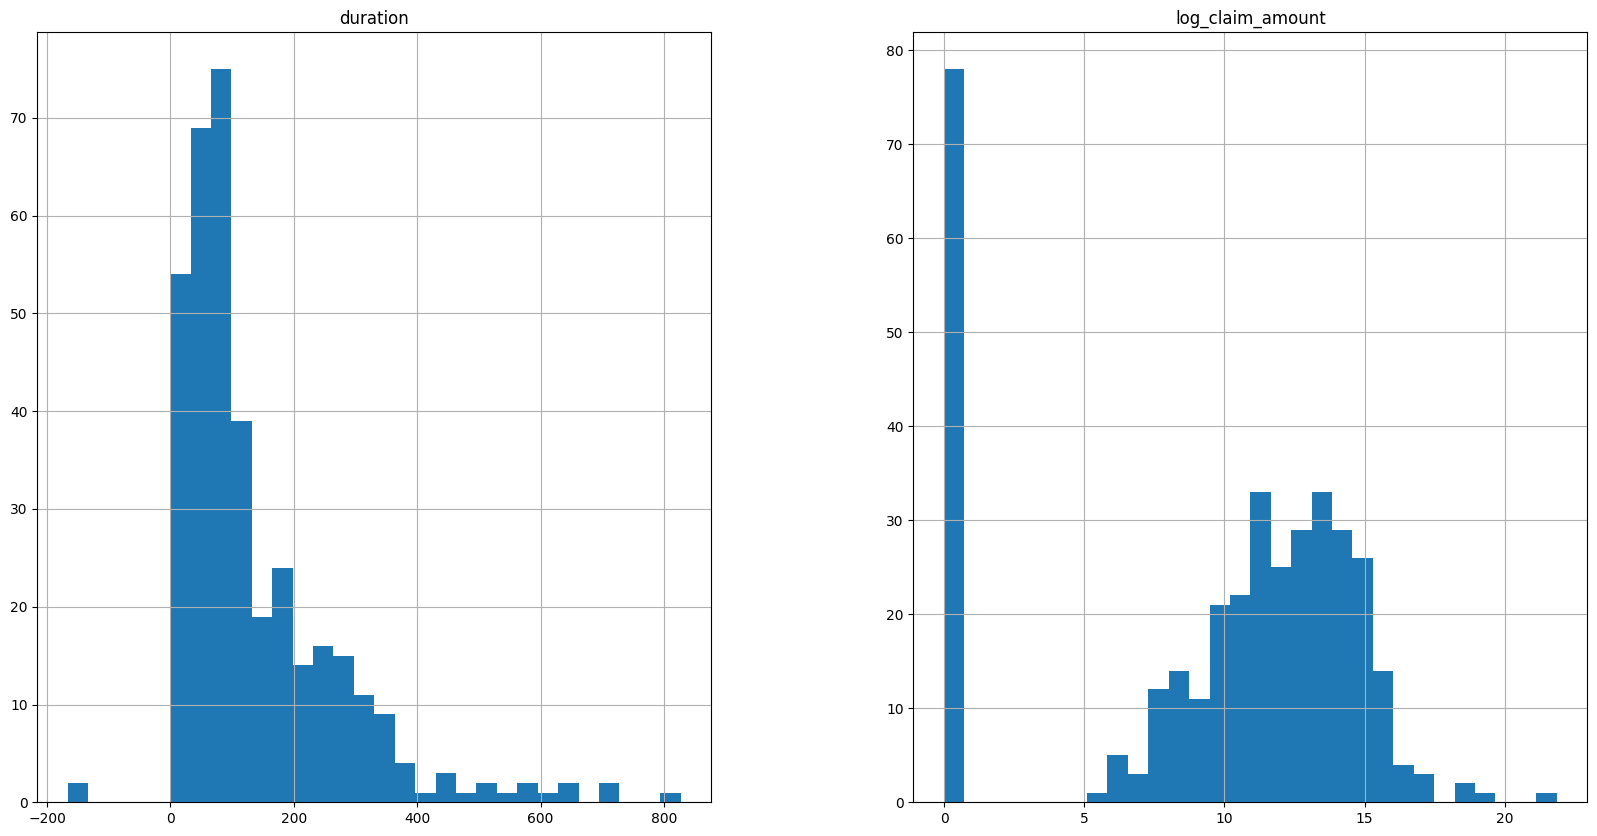

In [17]:
num_cols=['duration','log_claim_amount']

df[num_cols].hist(bins=30,figsize=(20,10))

Text(0.5, 1.0, 'матрица корреляций')

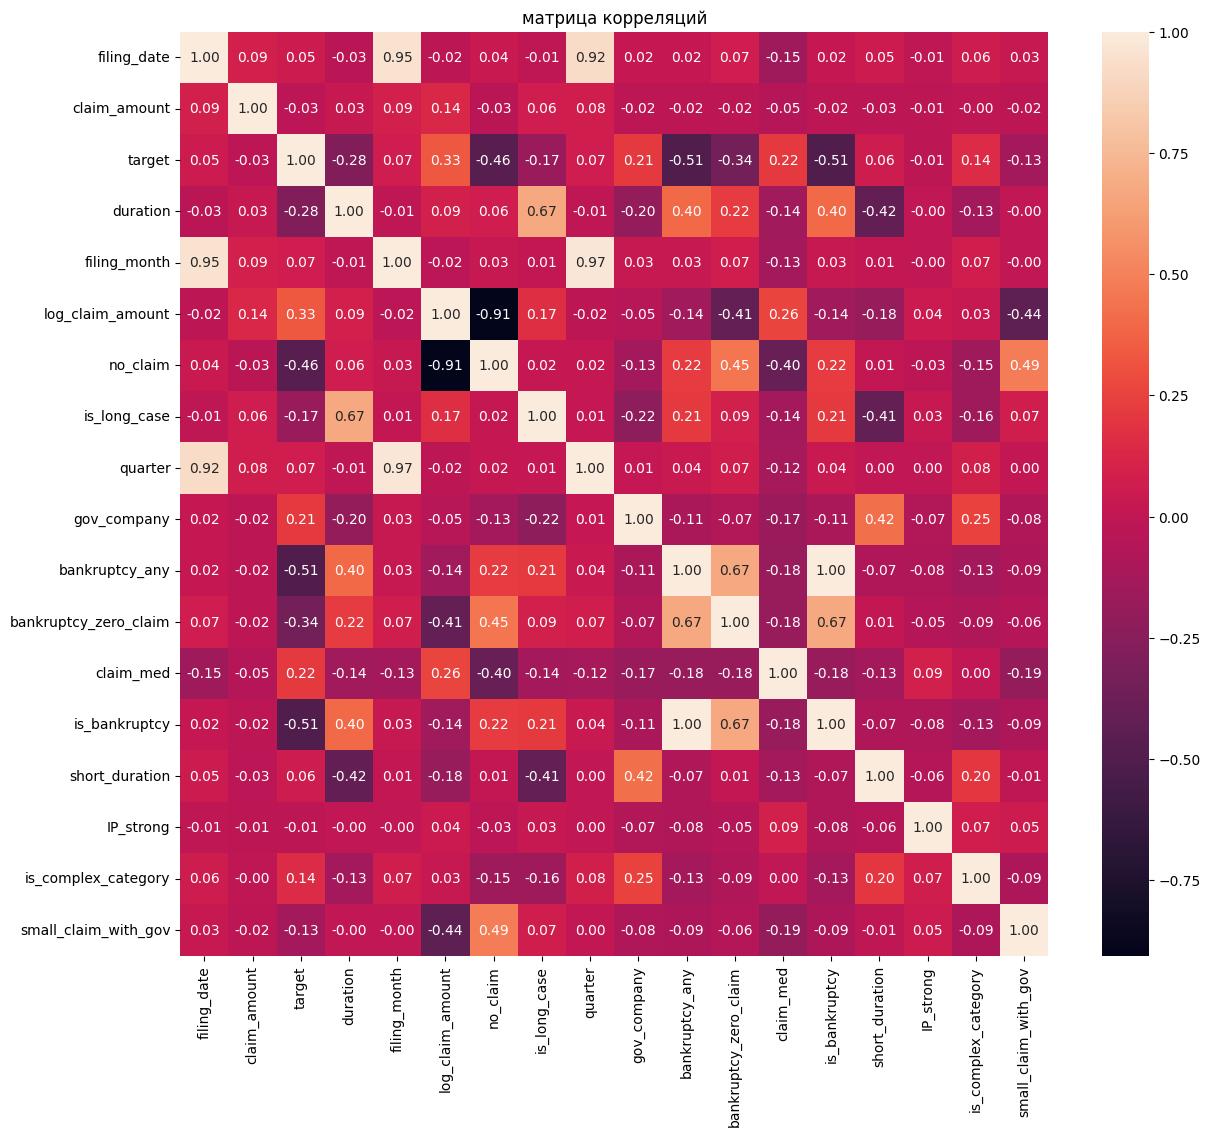

In [18]:
corr_cols=['filing_date','claim_amount','target','duration', 'filing_month',
           'log_claim_amount', 'no_claim','is_long_case', 'quarter',
           'gov_company', 'bankruptcy_any', 'bankruptcy_zero_claim', 'claim_med',
           'is_bankruptcy', 'short_duration', 'IP_strong', 'is_complex_category',
           'small_claim_with_gov']

corr_matrix=df[corr_cols].corr()

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix,annot=True,fmt='.2f')
plt.title('матрица корреляций')

In [19]:
X=pd.get_dummies(df[['category','plaintiff_type','defendant_type','claim_bin','judge']])

X['duration']=df['duration']
X['log_claim_amount']=df['log_claim_amount']
X['filing_month']=df['filing_month']
X['no_claim']=df['no_claim']
X['is_bankruptcy']=df['is_bankruptcy']
X['short_duration']=df['short_duration']
X['IP_strong']=df['IP_strong']
X['is_complex_category']=df['is_complex_category']
X['small_claim_with_gov']=df['small_claim_with_gov']

interaction_features = ['gov_company', 'bankruptcy_any', 'bankruptcy_zero_claim','claim_med', 'is_long_case', 'quarter']

for fe in interaction_features:
  X[fe]=df[fe]


y=df['target']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y_encoded=le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model1=RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)

model1.fit(X_train,y_train)

y_pred1=model1.predict(X_test)

print('classification report:')
print(classification_report(y_test,y_pred1))
print('\nconfusion matrix:')
print(confusion_matrix(y_test, y_pred1))

classification report:
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        17
           1       0.67      0.50      0.57        16
           2       0.83      0.93      0.87        41

    accuracy                           0.74        74
   macro avg       0.69      0.65      0.66        74
weighted avg       0.73      0.74      0.73        74


confusion matrix:
[[ 9  3  5]
 [ 5  8  3]
 [ 2  1 38]]


In [22]:
from xgboost import XGBClassifier

model2=XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42,
    max_depth=3,
    reg_alpha=0.01,
    reg_lambda=0.01
)

model2.fit(X_train,y_train)

y_pred2=model2.predict(X_test)

print('classification report:')
print(classification_report(y_test,y_pred2))
print('\nconfusion matrix:')
print(confusion_matrix(y_test,y_pred2))

classification report:
              precision    recall  f1-score   support

           0       0.48      0.59      0.53        17
           1       0.46      0.38      0.41        16
           2       0.82      0.80      0.81        41

    accuracy                           0.66        74
   macro avg       0.59      0.59      0.58        74
weighted avg       0.67      0.66      0.66        74


confusion matrix:
[[10  3  4]
 [ 7  6  3]
 [ 4  4 33]]


In [23]:
from lightgbm import LGBMClassifier

model3=LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    num_leaves=15,
    min_child_samples=5,
    reg_alpha=0.01,
    reg_lambda=0.01,
    random_state=42,
    verbose=-1
)

model3.fit(X_train,y_train)

y_pred3=model3.predict(X_test)

print('classification report:')
print(classification_report(y_test,y_pred3))
print('\nconfusion matrix:')
print(confusion_matrix(y_test,y_pred3))

classification report:
              precision    recall  f1-score   support

           0       0.48      0.59      0.53        17
           1       0.50      0.44      0.47        16
           2       0.82      0.78      0.80        41

    accuracy                           0.66        74
   macro avg       0.60      0.60      0.60        74
weighted avg       0.67      0.66      0.67        74


confusion matrix:
[[10  3  4]
 [ 6  7  3]
 [ 5  4 32]]


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model4 = LogisticRegression(
    multi_class='multinomial',
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

model4.fit(X_train_scaled, y_train)
y_pred4 = model4.predict(X_test_scaled)

print('classification report:')
print(classification_report(y_test, y_pred4))

classification report:
              precision    recall  f1-score   support

           0       0.60      0.53      0.56        17
           1       0.38      0.56      0.45        16
           2       0.74      0.63      0.68        41

    accuracy                           0.59        74
   macro avg       0.57      0.58      0.57        74
weighted avg       0.63      0.59      0.61        74



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [25]:
# попробуем улучшить модель

from sklearn.model_selection import GridSearchCV

param={
    'n_estimators':[100,200],
    'max_depth':[5,10],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2],
    'max_features':['sqrt','log2']
}

grid_search=GridSearchCV(
    RandomForestClassifier(class_weight='balanced',random_state=42),
    param,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train,y_train)

best_rf=grid_search.best_estimator_
y_pred1_grid=best_rf.predict(X_test)

print('до оптимизации:')
print(classification_report(y_test,y_pred1))
print('\nпосле оптимизации:')
print(classification_report(y_test,y_pred1_grid))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
до оптимизации:
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        17
           1       0.67      0.50      0.57        16
           2       0.83      0.93      0.87        41

    accuracy                           0.74        74
   macro avg       0.69      0.65      0.66        74
weighted avg       0.73      0.74      0.73        74


после оптимизации:
              precision    recall  f1-score   support

           0       0.53      0.47      0.50        17
           1       0.70      0.44      0.54        16
           2       0.80      0.95      0.87        41

    accuracy                           0.73        74
   macro avg       0.68      0.62      0.64        74
weighted avg       0.71      0.73      0.71        74



In [26]:
print("лучшие параметры по GridSearchCV:")
for param_name, param_value in grid_search.best_params_.items():
    print(f"  {param_name}: {param_value}")
print(f"best CV score: {grid_search.best_score_:.3f}")

лучшие параметры по GridSearchCV:
  max_depth: 5
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 100
best CV score: 0.675


Text(0, 0.5, 'признак')

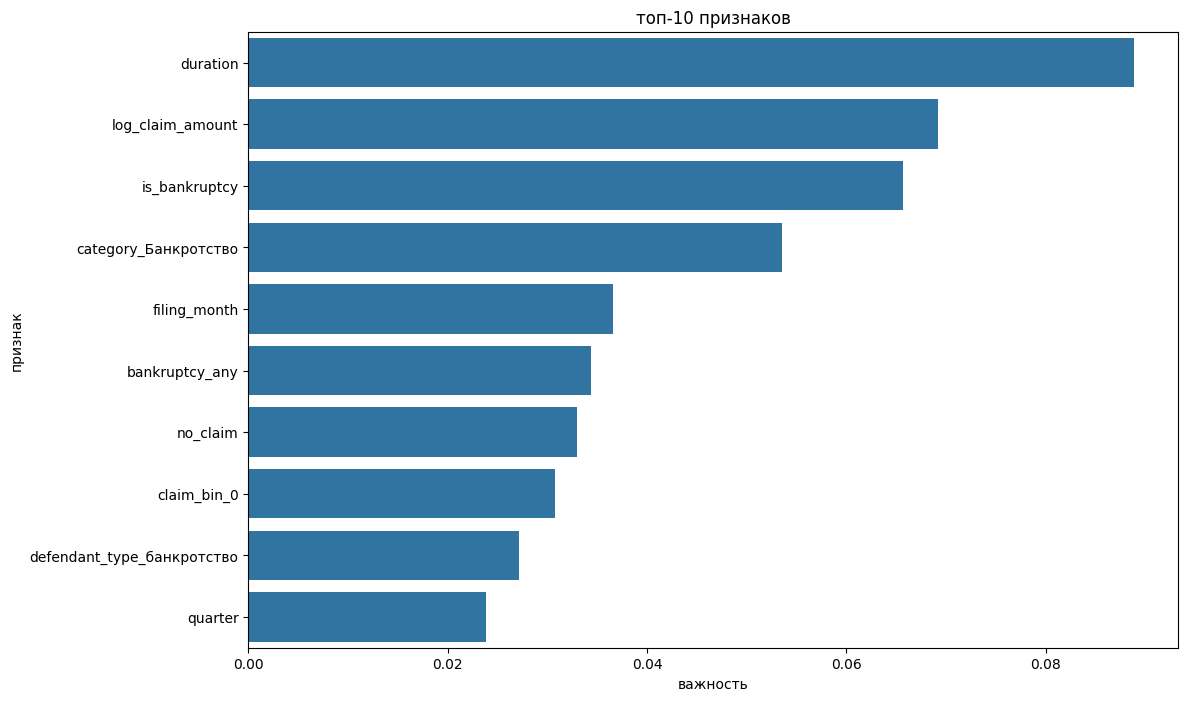

In [27]:
feature_importance=pd.DataFrame(
    {
        'feature':X.columns,
        'importance':model1.feature_importances_
    }
).sort_values('importance',ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(data=feature_importance.head(10),x='importance',y='feature')
plt.title('топ-10 признаков')
plt.xlabel('важность')
plt.ylabel('признак')